In [1]:
import numpy as np
import heapq
from matplotlib import colors
import matplotlib.pyplot as plt
import time

# 1. Make map

In [2]:
def make_map(size):
    direction = np.array([[1, 0], [0, 1]])
    direction2 = np.array([[1, 0], [0, 1], [-1, 0], [0, -1],
                           [1, 1], [-1, 1], [1, -1], [-1, -1]])
    m, n = size
    grid = np.zeros((m, n), dtype=int)

    present = np.array([0, 0])
    grid[present[0], present[1]] = 1
    while True:
        d = np.random.choice([0, 1])
        if present[0] + direction[d][0] >= m or present[1] + direction[d][1] >= n:
            break
        present[0] += direction[d][0]
        present[1] += direction[d][1]
        grid[present[0], present[1]] = 1
        for i in range(8):
            ni = present[0] + direction2[i][0]
            nj = present[1] + direction2[i][1]
            if ni < 0 or ni >= m or nj < 0 or nj >= n:
                continue
            grid[ni, nj] = 1

    return grid, tuple(present)

In [3]:
grid = np.array([
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],
    [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]
])

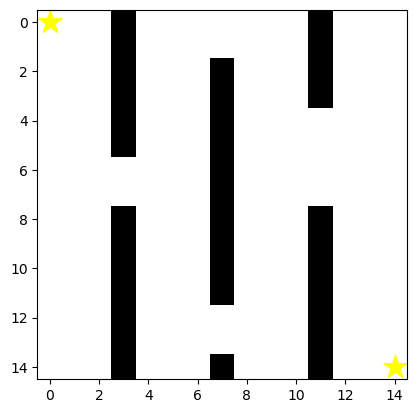

In [4]:
size = (15, 15)
start = [0,0]
goal = [14,14]
#grid, goal = make_map(size)
plt.imshow(grid, cmap='gray')
plt.scatter([start[1], goal[1]], [start[0], goal[0]], color='yellow', marker='*', s=300)
plt.show()

# 2. A* Algorithm

In [5]:
def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar(grid, start, goal):
    searching_points = set()
    count = 0

    m, n = grid.shape
    # Allowed moves: 8-directional
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1),
                  (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    open_set = []
    heapq.heappush(open_set, (heuristic(start, goal), 0, start, [start]))
    closed_set = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        if current == goal:
            return path, count, searching_points
        if current in closed_set:
            continue
        closed_set.add(current)
        
        for dr, dc in directions:
            count = count + 1
            nr, nc = current[0] + dr, current[1] + dc
            neighbor = (nr, nc)
            # Check boundaries and whether the cell is traversable (value 1)
            if 0 <= nr < m and 0 <= nc < n and grid[nr, nc] == 1:
                searching_points.add(neighbor)
                if neighbor in closed_set:
                    continue
                new_cost = g + 1  # uniform cost for each move
                heapq.heappush(open_set, (new_cost + heuristic(neighbor, goal),
                                            new_cost, neighbor, path + [neighbor]))
                
    return None, count, searching_points # No path found

def plot_path(grid, path, start, goal, searching_points, llm_points = None):
    m, n = grid.shape

    searching_map = np.zeros_like(grid)

    cmap = colors.ListedColormap(['black','white', 'orange'])

    for point in searching_points:
        searching_map[point[0],point[1]] = 1
    plt.figure(figsize=(14,9))
    plt.imshow(searching_map + grid, cmap = cmap)
    if path:
        path_rows = [p[0] for p in path]
        path_cols = [p[1] for p in path]
        plt.plot(path_cols, path_rows, color='red', linewidth=2, marker='o')
    
    
    plt.scatter([start[1], goal[1]], [start[0], goal[0]], color='yellow', marker='*', s=300)
    plt.text(start[1], start[0], 'Start', color='black', fontsize=12,
             verticalalignment='bottom', horizontalalignment='right')
    plt.text(goal[1], goal[0], 'Goal', color='black', fontsize=12,
             verticalalignment='bottom', horizontalalignment='left')
    if llm_points is not None:
        llm_points = np.array(llm_points)
        plt.scatter(llm_points[:,1], llm_points[:,0], color='yellow', s=100)
        plt.title(f"LLM A* (# of llm_points = {len(llm_points)})")
        plt.axis('off')
        plt.savefig(f"LLM A* (# of llm_points = {len(llm_points)}).png", dpi = 200)
        plt.show()
    else :
        plt.title("A* Algorithm")
        plt.axis('off')
        plt.savefig("A* Algorithm.png", dpi = 200)
        plt.show()
    

In [17]:
t = []
searching = []
path_length = []
iteration = 1000

Path found with length: 25
Number of searching: 736
함수 수행시간: 0.000639 초


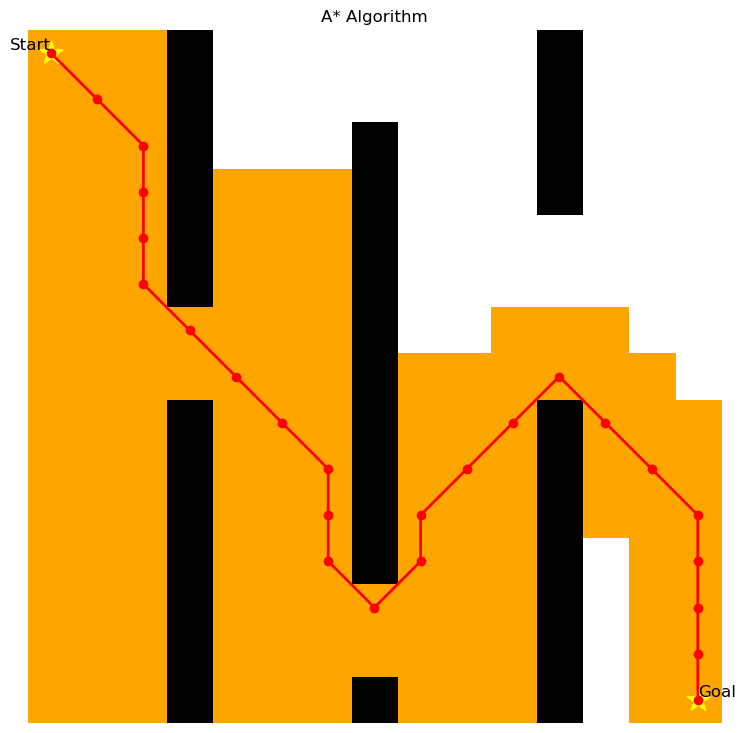

In [18]:
start = (0, 0)
goal = (14,14)

t_sum = 0
for i in range(iteration):
    t_start = time.time()
    path, count, searching_points = astar(grid, start, goal)
    t_end = time.time()
    t_sum += t_end - t_start

t_ = t_sum/iteration
t.append(t_)
searching.append(count)
path_length.append(len(path))
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")
print("Number of searching:", count)
print("함수 수행시간: %f 초" % (t_))
plot_path(grid, path, start, goal, searching_points)

# 3. LLM A* Algorithm

In [19]:
def llm_astar(grid, start, goal, llm_points):

    m, n = grid.shape
    # Allowed moves: 8-directional
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1),
                  (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    points = llm_points.copy()
    points.insert(0, start)
    points.append(goal)

    path = []
    searching_point = set()
    count = 0

    for i in range(len(points)-1):
        s = points[i]
        e = points[i+1]

        open_set = []
        heapq.heappush(open_set, (heuristic(s, e), 0, s, [s]))
        closed_set = set()

        while open_set:
            f, g, current, p = heapq.heappop(open_set)
            if current == e:
                path += p
                if path[-1] in llm_points:
                    path.pop()
                break
            if current in closed_set:
                continue
            closed_set.add(current)
            
            for dr, dc in directions:
                count = count + 1
                nr, nc = current[0] + dr, current[1] + dc
                neighbor = (nr, nc)
                # Check boundaries and whether the cell is traversable (value 1)
                if 0 <= nr < m and 0 <= nc < n and grid[nr, nc] == 1:
                    searching_point.add(neighbor)
                    if neighbor in closed_set:
                        continue
                    new_cost = g + 1  # uniform cost for each move
                    heapq.heappush(open_set, (new_cost + heuristic(neighbor, e),
                                                new_cost, neighbor, p + [neighbor]))
                    
    return path, count, searching_point

### LLM points 1 : (12, 7)

Goal position: (14, 14)
Path found with length: 25
Number of searching: 432
함수 수행시간: 0.000368 초


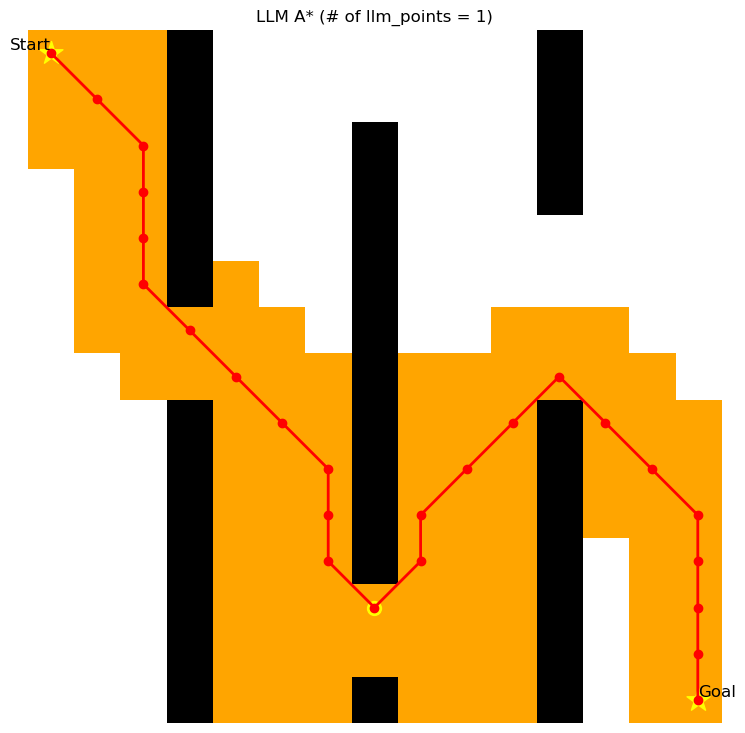

In [20]:
llm_points = [(12, 7)]
start = (0, 0)
goal = (14,14)
t_sum = 0

for i in range(iteration):
    t_start = time.time()
    path, count, searching_points = llm_astar(grid, start, goal, llm_points)
    t_end = time.time()
    t_sum += t_end - t_start

t_ = t_sum/iteration
t.append(t_)
searching.append(count)
path_length.append(len(path))
print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of searching:", count)
print("함수 수행시간: %f 초" % (t_))
plot_path(grid, path, start, goal, searching_points, llm_points)


### LLM points 3 : (6, 2), (12, 7), (8, 12)

Goal position: (14, 14)
Path found with length: 25
Number of searching: 216
함수 수행시간: 0.000185 초


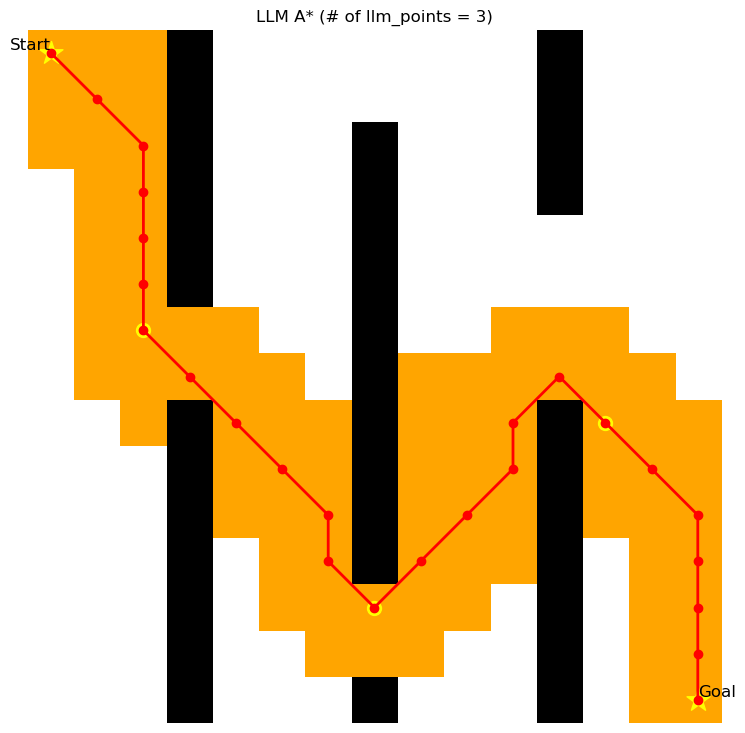

In [21]:
llm_points = [(6, 2), (12, 7), (8, 12)]
start = (0, 0)
goal = (14,14)
t_sum = 0

for i in range(iteration):
    t_start = time.time()
    path, count, searching_points = llm_astar(grid, start, goal, llm_points)
    t_end = time.time()
    t_sum += t_end - t_start

t_ = t_sum/iteration
t.append(t_)
searching.append(count)
path_length.append(len(path))
print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of searching:", count)
print("함수 수행시간: %f 초" % (t_))
plot_path(grid, path, start, goal, searching_points, llm_points)

### LLM points 5 : (4, 2), (8, 4), (12, 7), (8, 10), (10, 12)

Goal position: (14, 14)
Path found with length: 25
Number of searching: 208
함수 수행시간: 0.000178 초


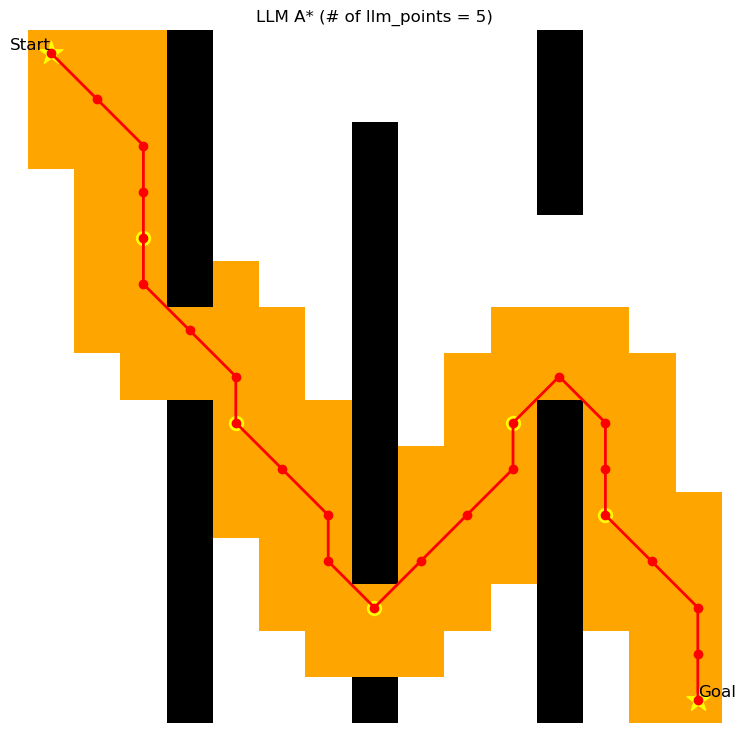

In [22]:
llm_points = [(4, 2), (8, 4), (12, 7), (8, 10), (10, 12)]
start = (0, 0)
goal = (14,14)
t_sum = 0

for i in range(iteration):
    t_start = time.time()
    path, count, searching_points = llm_astar(grid, start, goal, llm_points)
    t_end = time.time()
    t_sum += t_end - t_start

t_ = t_sum/iteration
t.append(t_)
searching.append(count)
path_length.append(len(path))
print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of searching:", count)
print("함수 수행시간: %f 초" % (t_))
plot_path(grid, path, start, goal, searching_points, llm_points)


### LLM points 7 : (3, 1), (5, 2), (7, 3), (9, 4), (11, 6), (11, 8), (9, 9)

Goal position: (14, 14)
Path found with length: 25
Number of searching: 336
함수 수행시간: 0.000279 초


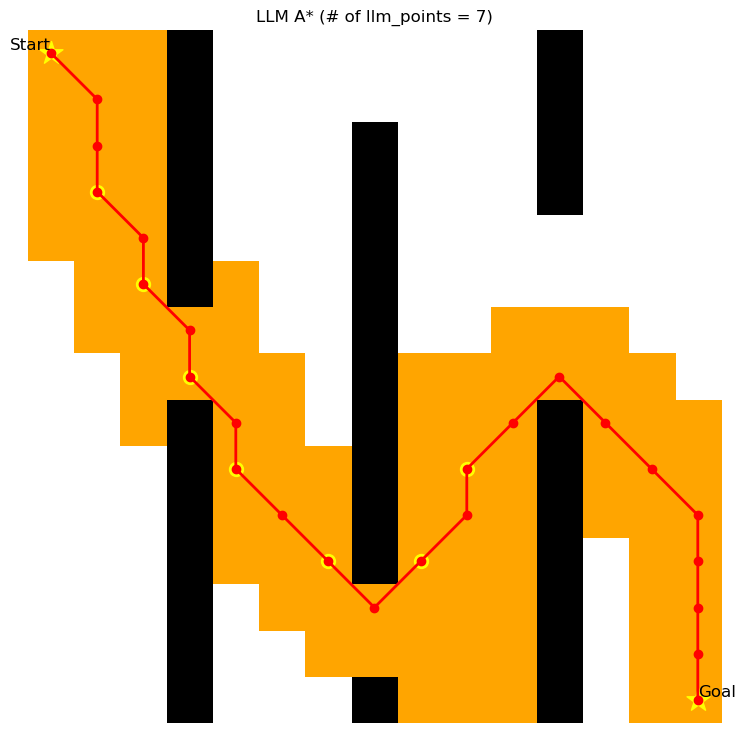

In [23]:
llm_points = [(3, 1), (5, 2), (7, 3), (9, 4), (11, 6), (11, 8), (9, 9)]
start = (0, 0)
goal = (14,14)
t_sum = 0

for i in range(iteration):
    t_start = time.time()
    path, count, searching_points = llm_astar(grid, start, goal, llm_points)
    t_end = time.time()
    t_sum += t_end - t_start

t_ = t_sum/iteration
t.append(t_)
searching.append(count)
path_length.append(len(path))
print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of searching:", count)
print("함수 수행시간: %f 초" % (t_))
plot_path(grid, path, start, goal, searching_points, llm_points)


### LLM points 11 : (2, 0), (4, 2), (6, 2), (8, 4), (10, 5), (12, 7), (10, 8), (8, 10), (8, 12), (10, 12), (12, 12)

Goal position: (14, 14)
Path found with length: 25
Number of searching: 192
함수 수행시간: 0.000179 초


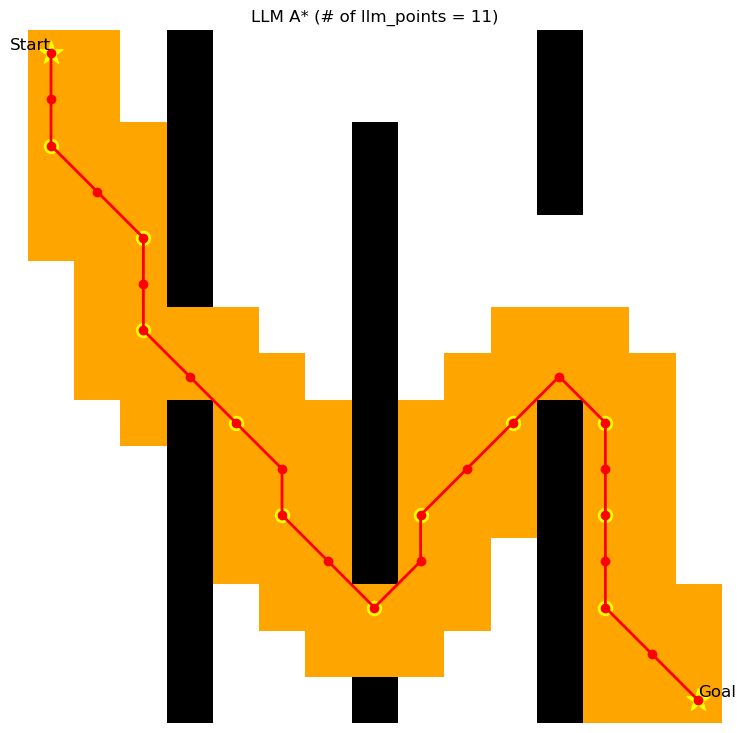

In [24]:
llm_points = [(2, 0), (4, 2), (6, 2), (8, 4), (10, 5), (12, 7), (10, 8), (8, 10), (8, 12), (10, 12), (12, 12)]
start = (0, 0)
goal = (14,14)
t_sum = 0

for i in range(iteration):
    t_start = time.time()
    path, count, searching_points = llm_astar(grid, start, goal, llm_points)
    t_end = time.time()
    t_sum += t_end - t_start

t_ = t_sum/iteration
t.append(t_)
searching.append(count)
path_length.append(len(path))
print("Goal position:", goal)
if path is not None:
    print("Path found with length:", len(path))
else:
    print("No path found.")

print("Number of searching:", count)
print("함수 수행시간: %f 초" % (t_))
plot_path(grid, path, start, goal, searching_points, llm_points)

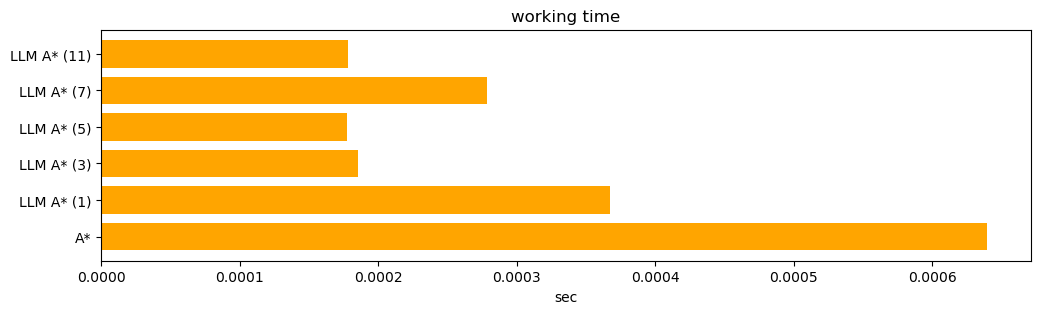

In [25]:
t = np.array(t)
x = ['A*','LLM A* (1)','LLM A* (3)','LLM A* (5)','LLM A* (7)','LLM A* (11)']
plt.figure(figsize=(12,3))
plt.barh(x,t,height=0.75, color = 'orange')
plt.title("working time")
plt.xlabel("sec")
plt.savefig("time config.png",dpi=200)
plt.show()

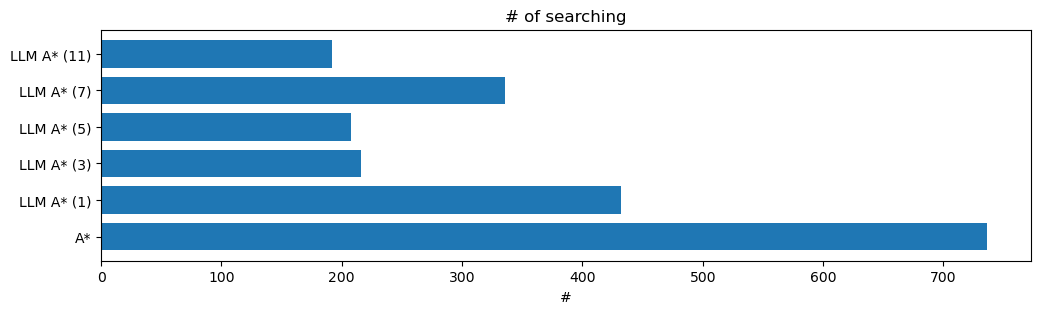

In [26]:
searching = np.array(searching)
x = ['A*','LLM A* (1)','LLM A* (3)','LLM A* (5)','LLM A* (7)','LLM A* (11)']
plt.figure(figsize=(12,3))
plt.barh(x,searching,data=t,height=0.75)
plt.title("# of searching")
plt.xlabel("#")
plt.savefig("number of check config.png",dpi=200)
plt.show()

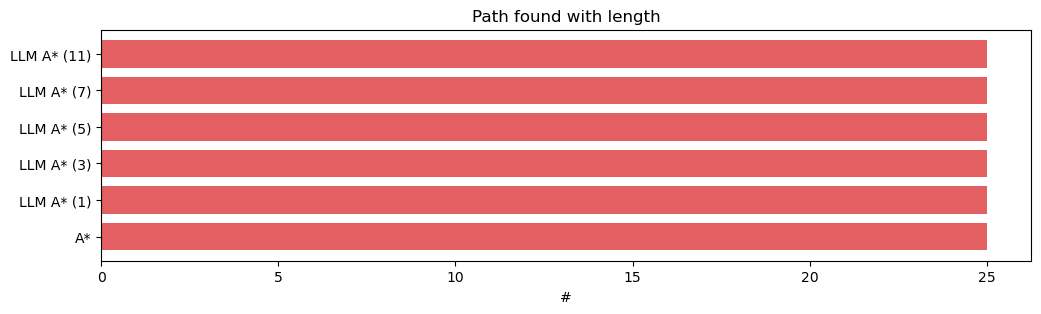

In [27]:
path_length = np.array(path_length)
x = ['A*','LLM A* (1)','LLM A* (3)','LLM A* (5)','LLM A* (7)','LLM A* (11)']
plt.figure(figsize=(12,3))
plt.barh(x,path_length,height=0.75, color = '#e35f62')
plt.title("Path found with length")
plt.xlabel("#")
plt.savefig("path found with length.png",dpi=200)
plt.show()